# 실습 2 - 전복 나이 예측

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로드

In [58]:
# Load the dataset
# https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset?resource=download
df = pd.read_csv('data/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [59]:
X = df.drop('Rings', axis=1)
y = df['Rings']

## 데이터 EDA

In [60]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

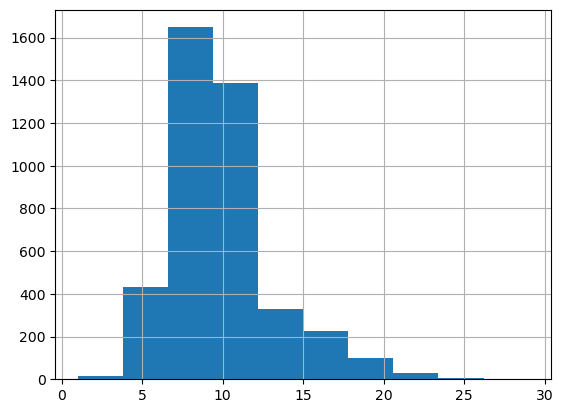

In [61]:
df['Rings'].hist()

In [62]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [63]:
X.shape, y.shape

((4177, 8), (4177,))

## 데이터 전처리

- 각 subchapter에 해당 사항 없는 경우 pass

### 결측치 처리

### 범주형 변수 처리

In [64]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [65]:
# one-hot encoding
X_onehot = pd.get_dummies(X)
X_onehot.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


### 데이터 분할

In [66]:
# to numpy
X_onehot = X_onehot.to_numpy()
y = y.to_numpy()

print(X_onehot.shape, y.shape)

(4177, 10) (4177,)


In [67]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X_onehot, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=1/9, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(3341, 10) (418, 10) (418, 10)


### 특성 스케일링

In [68]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### 특성 인코딩

### 타겟 범주 인코딩

### 타겟 스케일링

(array([1.300e+01, 4.400e+01, 3.060e+02, 3.140e+02, 4.600e+02, 1.035e+03,
        4.070e+02, 2.080e+02, 2.650e+02, 7.700e+01, 5.400e+01, 7.900e+01,
        2.800e+01, 2.400e+01, 1.400e+01, 6.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 2.  ,  3.35,  4.7 ,  6.05,  7.4 ,  8.75, 10.1 , 11.45, 12.8 ,
        14.15, 15.5 , 16.85, 18.2 , 19.55, 20.9 , 22.25, 23.6 , 24.95,
        26.3 , 27.65, 29.  ]),
 <BarContainer object of 20 artists>)

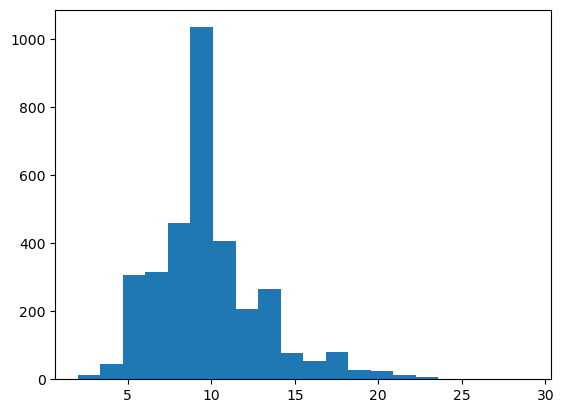

In [69]:
plt.hist(y_train, bins=20)

In [70]:
target_scaler = StandardScaler()
target_scaler.fit(y_train.reshape(-1, 1))
y_train_scaled = target_scaler.transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()

# 모델링

## 모델 정의

In [71]:
# knn
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)

## 모델 학습

In [72]:
# train
knn.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(n_neighbors=3)

## 모델 평가

In [73]:
# validation
val_r2 = knn.score(X_val_scaled, y_val_scaled)
print("Validation R2: {:.2f}".format(val_r2))

Validation R2: 0.50


# 최종 평가

## 최종 평가

In [74]:
# test
test_r2 = knn.score(X_test_scaled, y_test_scaled)
print("Test R2: {:.2f}".format(test_r2))

Test R2: 0.48


In [75]:
# inverse transform
y_pred_scaled = knn.predict(X_test_scaled)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

## 다양한 분석

- mae, mse, rmse, r2_score
- scatter plot
- residual plot

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.3f}'.format(mae))

# mean squared error
mse = mean_squared_error(y_test, y_pred)
print('MSE: {:.3f}'.format(mse))

# root mean squared error
rmse = np.sqrt(mse)
print('RMSE: {:.3f}'.format(rmse))

# r2 score
r2 = r2_score(y_test, y_pred)
print('R2: {:.3f}'.format(r2))

MAE: 1.723
MSE: 5.877
RMSE: 2.424
R2: 0.477


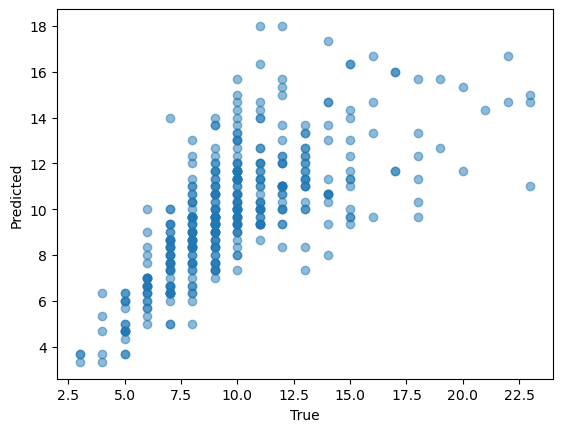

In [77]:
# scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

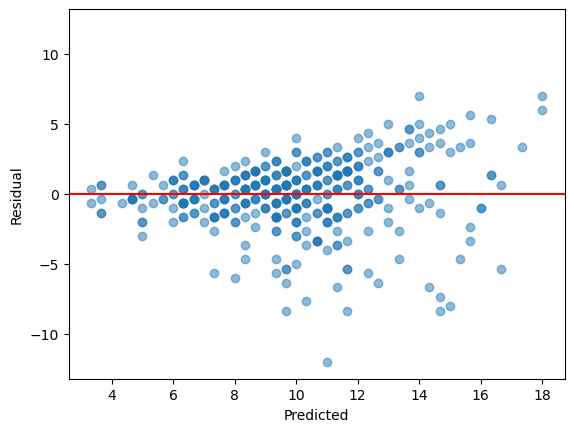

In [78]:
# residual plot
plt.scatter(y_pred, y_pred - y_test, alpha=0.5)
plt.axhline(0, color='red')
max_range = max(abs(y_pred - y_test)) * 1.1
plt.ylim(-max_range, max_range)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()